<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/LogistiqueRegressionDiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy import log,dot,e,shape
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score,precision_score
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pickle

#【problem1】Hypothetical function

In [3]:
def hypothetical_function(self,X):
  sig = 1/(1+np.e(**(-X)))
  return sig


In [4]:
def initialize(self,X):
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[X][0],1)),X]
        return weights,X

#【problem2】Steepest descent

In [5]:
def _gradient_descent(self,X,y,alpha=0.001,iter=100):
  params,X = self.initialize(X)
  cost_list = np.zeros(iter,)
  for i in range(iter):
      params = params - alpha * dot(X.T, self.hypothetical_function(dot(X,params)) - np.reshape(y,(len(y),1)))
      cost_list[i] = cost(params)
  self.params = params
  return cost_list

#【problem 3】Estimated

In [6]:
def predict(self,X):
    z = dot(self._gradient_descent(X)[1],self.weights)
    lis = []
    for i in self.hypothetical_function(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

#[Problem 4] Objective function

In [7]:
def cost(self, theta,X,y):
  z = np.dot(X,theta)
  cost0 = y.T.dot(log(self.hypothetical_function(z)))
  cost1 = (1-y).T.dot(log(1-self.hypothetical_function(z)))
  cost = -((cost1 + cost0))/len(y) 
  return cost

#[Problem 5] Learning and estimation

In [8]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.cost_list = np.zeros(self.iter)

    def initialize(self,X):
        self.theta = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return self.theta,X

    def hypothetical_function(self,X):
        sig = 1/(1+np.exp(-X))
        return sig


    def fit(self, X, y):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """  
        params,X = self.initialize(X)
        y=y.reshape(y.size,1)
        print(X.shape)
        print(y.shape)
        for i in range(self.iter):
            params = params - self.lr * dot(X.T, self.hypothetical_function(dot(X,params)) - np.reshape(y,(len(y),1)))
            self.cost_list[i] = self.cost(params,X,y)
        self.params = params
        np.save("thetas",self.params)

        if self.verbose:
            #Output learning process when verbose is set to True
            print()
            # courbe d'apprentissage
            plt.plot(np.arange(1,self.iter),self.cost_list[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')

        pass

        return self.params

    def cost(self,theta,X,y):
        z = dot(X,theta)
        cost0 = y.T.dot(log(self.hypothetical_function(z)))
        cost1 = (1-y).T.dot(log(1-self.hypothetical_function(z)))
        cost = -((cost1 + cost0))/len(y)
        return cost



    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        z = dot(self.initialize(X)[1],self.theta)
        lis = []
        for i in self.hypothetical_function(z):
            if i>0.5:
                lis.append(2)
            else:
                lis.append(1)

        pass
        return lis

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        
        
        return self.hypothetical_function(X)

In [9]:
from sklearn.datasets import load_iris
data = load_iris()
Y=data.target
X=data.data

dfX=pd.DataFrame(data=X,columns=["sepal_length","sepal_width","petal_length","petal_width"])
dfY=pd.DataFrame(data=Y,columns=["Species"])

basic_data_frame=pd.concat([dfX,dfY],axis=1)

# Versicolor = 1
# Setosa = 0
# Virginica = 2


# extraction des données 1
sepal_petal=dfX[["sepal_length","petal_length"]] 

# extraction des données 2
verginica_versicolor=dfY.loc[(dfY.Species==1)|(dfY.Species==2)]

df=pd.concat([verginica_versicolor,sepal_petal],axis=1)
X=df.loc[(df.Species==1)|(df.Species==2)]
y=np.array(X.Species)
X=X.drop(["Species"],axis=1)


X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [10]:
# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [11]:
y_train=y_train.reshape(y_train.size,1)
print(y_train.shape)
print(X_train.shape)

(60, 1)
(60, 2)


(60, 3)
(60, 1)



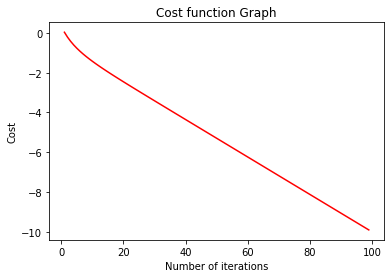

In [12]:
model=ScratchLogisticRegression(num_iter=100,lr=0.0001,bias=False,verbose=True)
theta=model.fit(X_train,y_train)

In [13]:
y_pred=model.predict(X_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.425


###Compare this with the scikit-learn implementation and see if it works correctly.



In [14]:
classifier = LogisticRegression(random_state = 2, penalty = 'none')
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)

accuracy_score(y_test, y_pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85

sklearn LogisticRegression is better precise than the scrach class the we have done

#[Problem 6] Plot of learning curve

Already done 

#[Problem 7] Visualization of decision area

In [15]:

def decision_region(X,y,model,step=0.01,title='decision region',xlabel='xlabel',ylabel='ylabel',target_names=['versicolor','virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X.iloc[:,0])-0.5, np.max(X.iloc[:,0])+0.5, step), np.arange(np.min(X.iloc[:,1])-0.5, np.max(X.iloc[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = np.array(model.predict(mesh)).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X.loc[y==target].iloc[:, 0], X.loc[y==target].iloc[:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


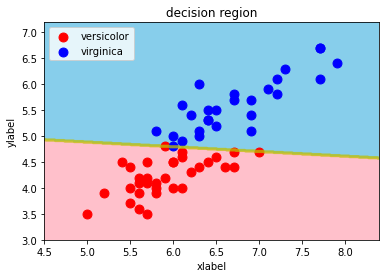

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


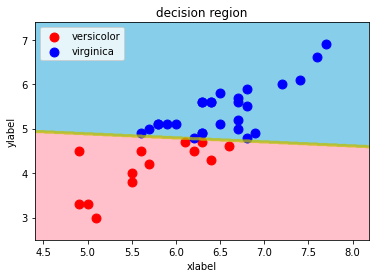

In [17]:
decision_region(X_train,y_train,classifier)
decision_region(X_test,y_pred1,classifier)


#[Problem 8] (Advance assignment) Saving weights

In [220]:
np.load('thetas.npy')

array([[0.28593569],
       [1.91072184],
       [1.58964979]])